# Importing the data

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [84]:
df = pd.read_csv("Cost_of_Living_Index_2022.csv")
df.head(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63


In [85]:
df.sample(5)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
102,103,Romania,35.24,10.17,23.49,31.38,30.02,48.12
28,29,Croatia,48.94,13.38,32.27,41.98,41.29,47.55
90,91,Norway,100.90,34.68,69.86,97.31,105.49,83.11
61,62,Japan,77.03,25.86,53.04,81.31,45.40,87.11
138,139,Zimbabwe,45.68,8.75,28.37,39.88,38.13,19.07


In [86]:
df.shape

(139, 8)

In [87]:
df.drop(labels=0,axis=0, inplace=True)

In [88]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,138.0,70.500000,39.981246,2.00,36.2500,70.500,104.7500,139.00
Cost of Living Index,138.0,50.404710,20.779508,19.92,34.7475,45.165,62.6950,146.04
Rent Index,138.0,19.411594,15.307722,3.91,9.5900,14.190,25.2000,98.58
Cost of Living Plus Rent Index,138.0,35.876449,17.489603,12.42,23.3600,31.260,44.9075,123.80
Groceries Index,138.0,46.867681,20.851950,17.81,31.2625,40.315,56.5950,148.66
Restaurant Price Index,138.0,43.669783,24.834465,14.48,25.4425,34.640,55.2625,159.17
Local Purchasing Power Index,138.0,46.595725,26.945405,1.45,27.4025,37.315,66.2875,118.44


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            138 non-null    int64  
 1   Country                         138 non-null    object 
 2   Cost of Living Index            138 non-null    float64
 3   Rent Index                      138 non-null    float64
 4   Cost of Living Plus Rent Index  138 non-null    float64
 5   Groceries Index                 138 non-null    float64
 6   Restaurant Price Index          138 non-null    float64
 7   Local Purchasing Power Index    138 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [91]:
df.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [92]:
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [93]:
df.nunique()

Rank                              138
Country                           138
Cost of Living Index              135
Rent Index                        132
Cost of Living Plus Rent Index    136
Groceries Index                   138
Restaurant Price Index            137
Local Purchasing Power Index      137
dtype: int64

In [94]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [95]:
df['Country'] = df['Country'].astype('str')

In [96]:
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

# Pre-processing

In [97]:
col = {'Cost of Living Index':'Cost_of_living_index',
       'Rent Index':'Rent_index',
      'Cost of Living Plus Rent Index':'Cost_of_living_plus_rent',
      'Groceries Index':'Groceries_index',
      'Restaurant Price Index':'Restaurant_price_index',
      'Local Purchasing Power Index':'Local_purchasing_index'}

In [98]:
df.rename(col,axis=1,inplace=True)
df.head()

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63


In [99]:
num = list(df.columns)
num.remove('Country')
num

['Rank',
 'Cost_of_living_index',
 'Rent_index',
 'Cost_of_living_plus_rent',
 'Groceries_index',
 'Restaurant_price_index',
 'Local_purchasing_index']

In [100]:
for i in num:
    df[i] = pd.to_numeric(df[i])

# EDA

In [101]:
len(df.Country.unique())

138

In [102]:
df['Cost_of_living_index'].max()

146.04

In [103]:
high_living_exp = df.nlargest(n=10,columns=['Cost_of_living_plus_rent'])
high_living_exp

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
15,16,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
62,63,Jersey,92.02,65.33,79.51,76.88,94.65,79.14
49,50,Hong Kong,80.71,74.57,77.83,84.72,58.58,65.74
109,110,Singapore,83.98,66.43,75.75,77.08,61.17,91.34
72,73,Luxembourg,80.50,60.09,70.93,74.75,88.79,98.84
51,52,Iceland,94.86,41.93,70.05,90.22,99.42,77.06
90,91,Norway,100.90,34.68,69.86,97.31,105.49,83.11
47,48,Guernsey,83.59,54.02,69.73,76.76,89.98,71.57
57,58,Israel,88.05,33.94,62.69,76.72,95.31,75.58


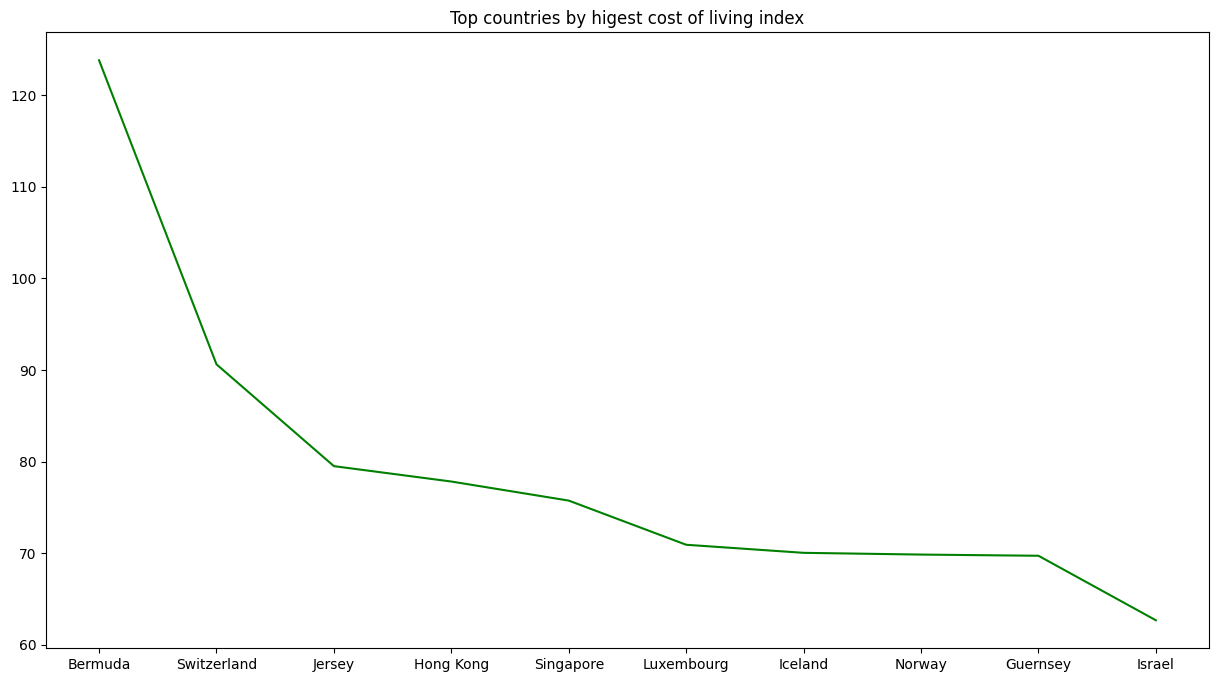

In [104]:
plt.figure(figsize=(15,8))
plt.plot('Country','Cost_of_living_plus_rent',data=high_living_exp,color='g')
plt.title('Top countries by higest cost of living index')
plt.show()

In [105]:
least_living_exp = df.nsmallest(n=10,columns=['Cost_of_living_plus_rent'])
least_living_exp = least_living_exp.sort_values('Cost_of_living_plus_rent',ascending=False)
least_living_exp

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
35,36,Egypt,29.52,5.82,18.41,27.42,23.42,21.54
126,127,Turkey,28.31,6.63,18.15,22.64,18.40,32.88
66,67,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86
26,27,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
120,121,Syria,28.75,5.17,17.70,29.34,22.81,6.59
125,126,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83
84,85,Nepal,28.29,3.96,16.89,26.45,20.41,22.96
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72
92,93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63


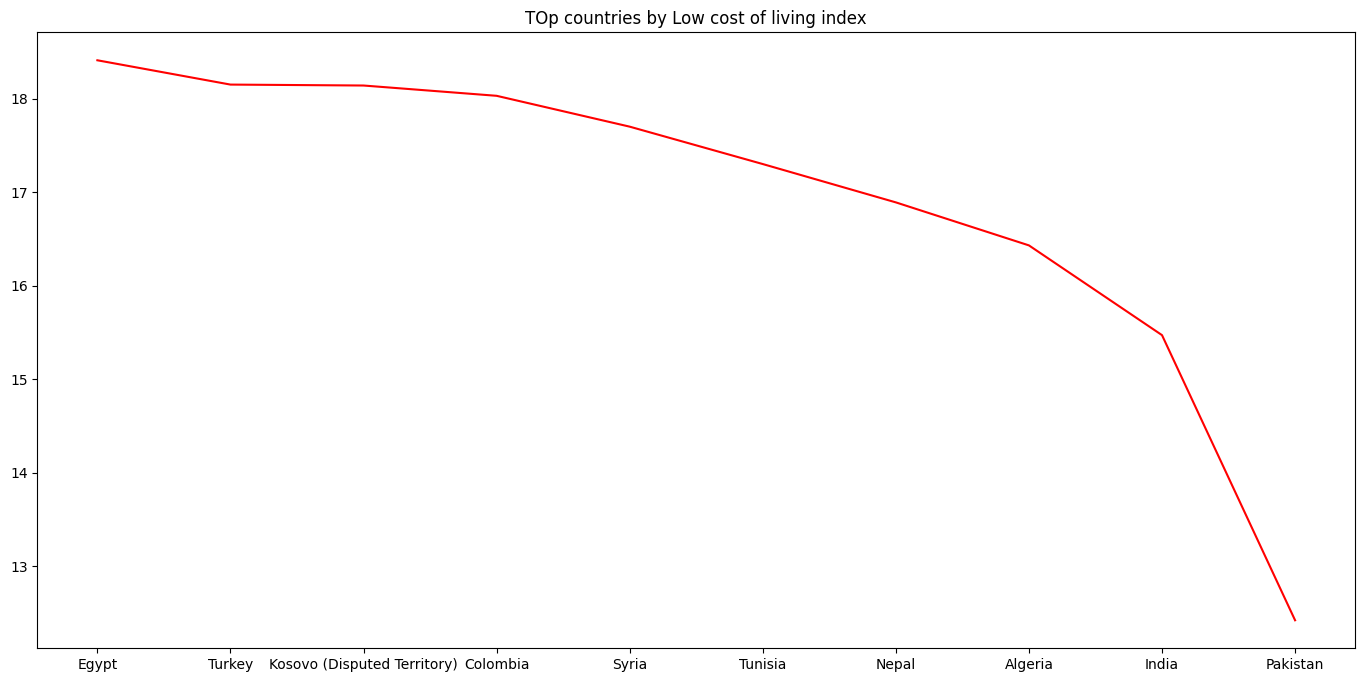

In [106]:
plt.figure(figsize=(17,8))
plt.plot('Country','Cost_of_living_plus_rent',data=least_living_exp,color='r')
plt.title('TOp countries by Low cost of living index')
plt.show()

In [107]:
df.head()

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63


In [108]:
high_purchasing = df.nlargest(n=10,columns=['Local_purchasing_index'])
high_purchasing

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
131,132,United States,70.13,42.07,56.98,70.37,70.07,106.34
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63
43,44,Germany,65.58,27.62,47.78,52.31,60.91,103.08
32,33,Denmark,84.12,33.23,60.26,68.60,98.75,99.45
72,73,Luxembourg,80.50,60.09,70.93,74.75,88.79,98.84
118,119,Sweden,71.74,25.86,50.23,65.78,72.61,98.14
101,102,Qatar,62.81,48.20,55.96,54.97,63.01,93.67
129,130,United Arab Emirates,58.33,43.28,51.28,46.67,61.53,92.17
105,106,Saudi Arabia,50.41,11.67,32.25,42.57,35.50,91.85


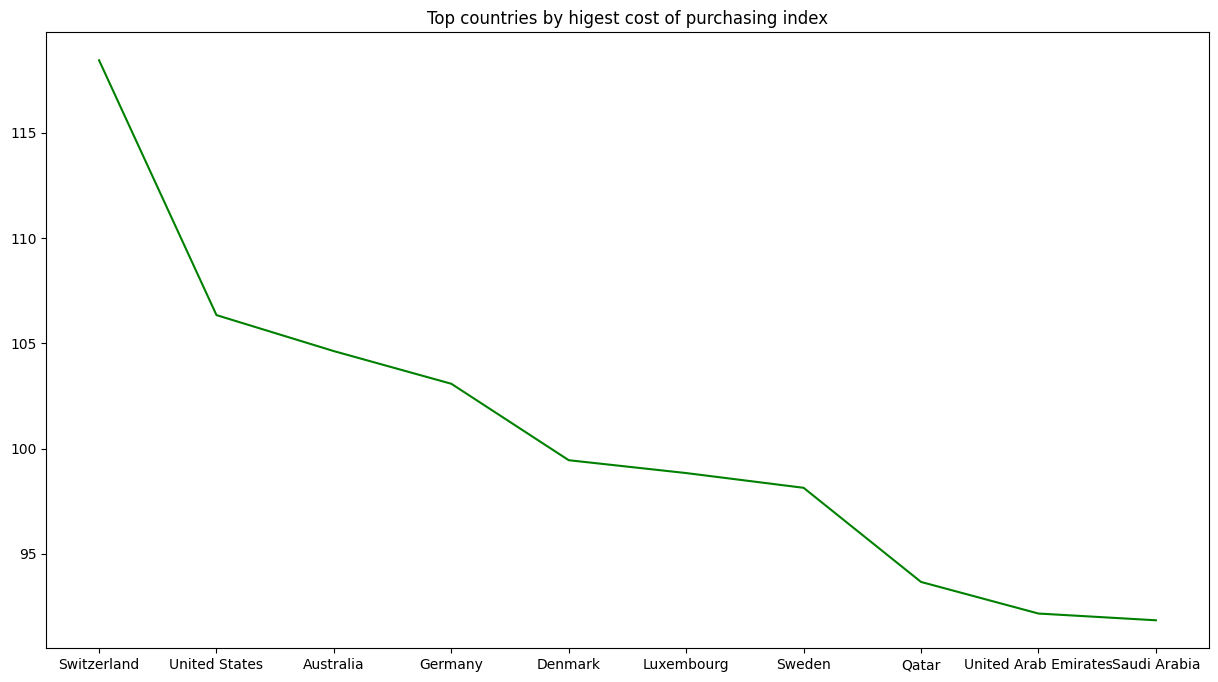

In [109]:
plt.figure(figsize=(15,8))
plt.plot('Country','Local_purchasing_index',data=high_purchasing,color='g')
plt.title('Top countries by higest cost of purchasing index')
plt.show()

In [110]:
least_purchasing = df.nsmallest(n=10,columns=['Local_purchasing_index'])
least_purchasing = least_purchasing.sort_values('Local_purchasing_index',ascending=False)
least_purchasing

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
83,84,Myanmar,35.67,21.18,28.87,37.63,20.00,13.84
117,118,Suriname,51.78,9.71,32.06,45.92,79.61,13.44
21,22,Cambodia,49.11,15.68,33.44,50.61,22.90,13.32
127,128,Uganda,33.50,9.19,22.10,31.00,24.85,11.41
38,39,Ethiopia,47.49,16.88,33.14,36.68,18.03,10.15
88,89,Nigeria,30.49,35.99,33.07,33.65,20.92,9.34
59,60,Ivory Coast,47.03,17.68,33.27,40.22,31.99,6.92
120,121,Syria,28.75,5.17,17.70,29.34,22.81,6.59
29,30,Cuba,55.00,15.23,36.36,47.93,33.54,1.45


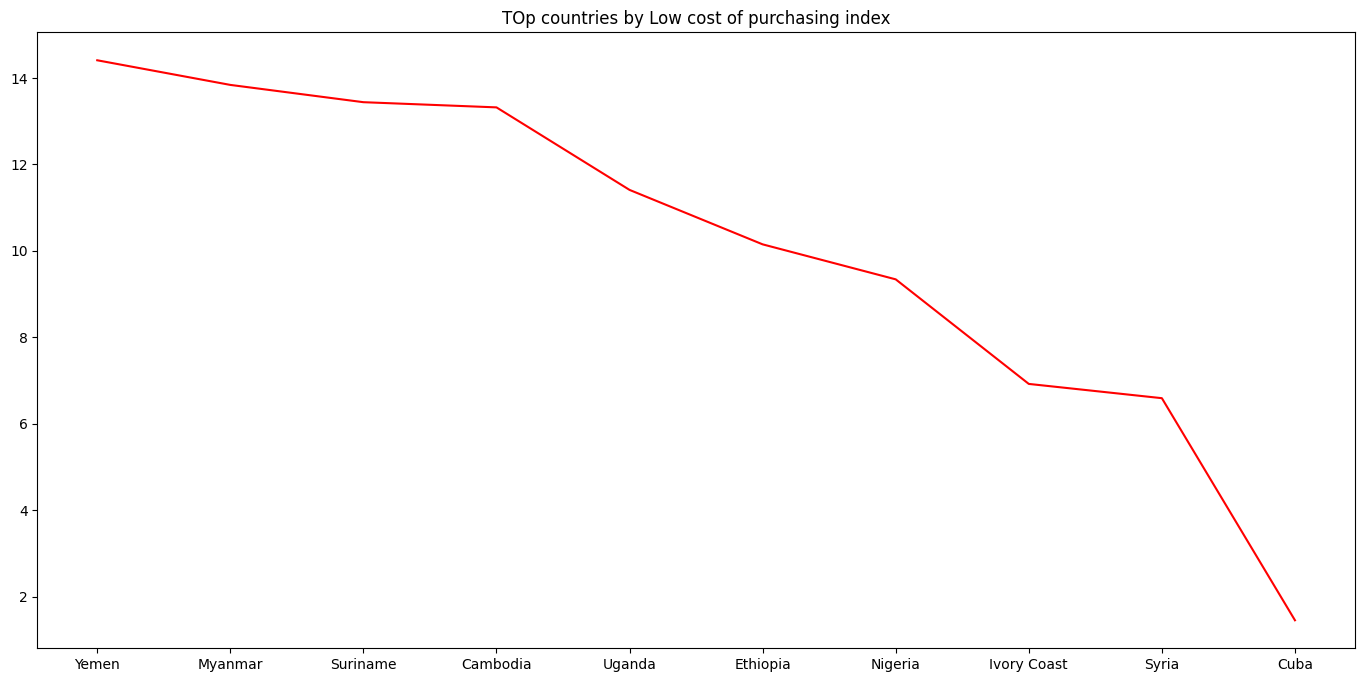

In [111]:
plt.figure(figsize=(17,8))
plt.plot('Country','Local_purchasing_index',data=least_purchasing,color='r')
plt.title('TOp countries by Low cost of purchasing index')
plt.show()

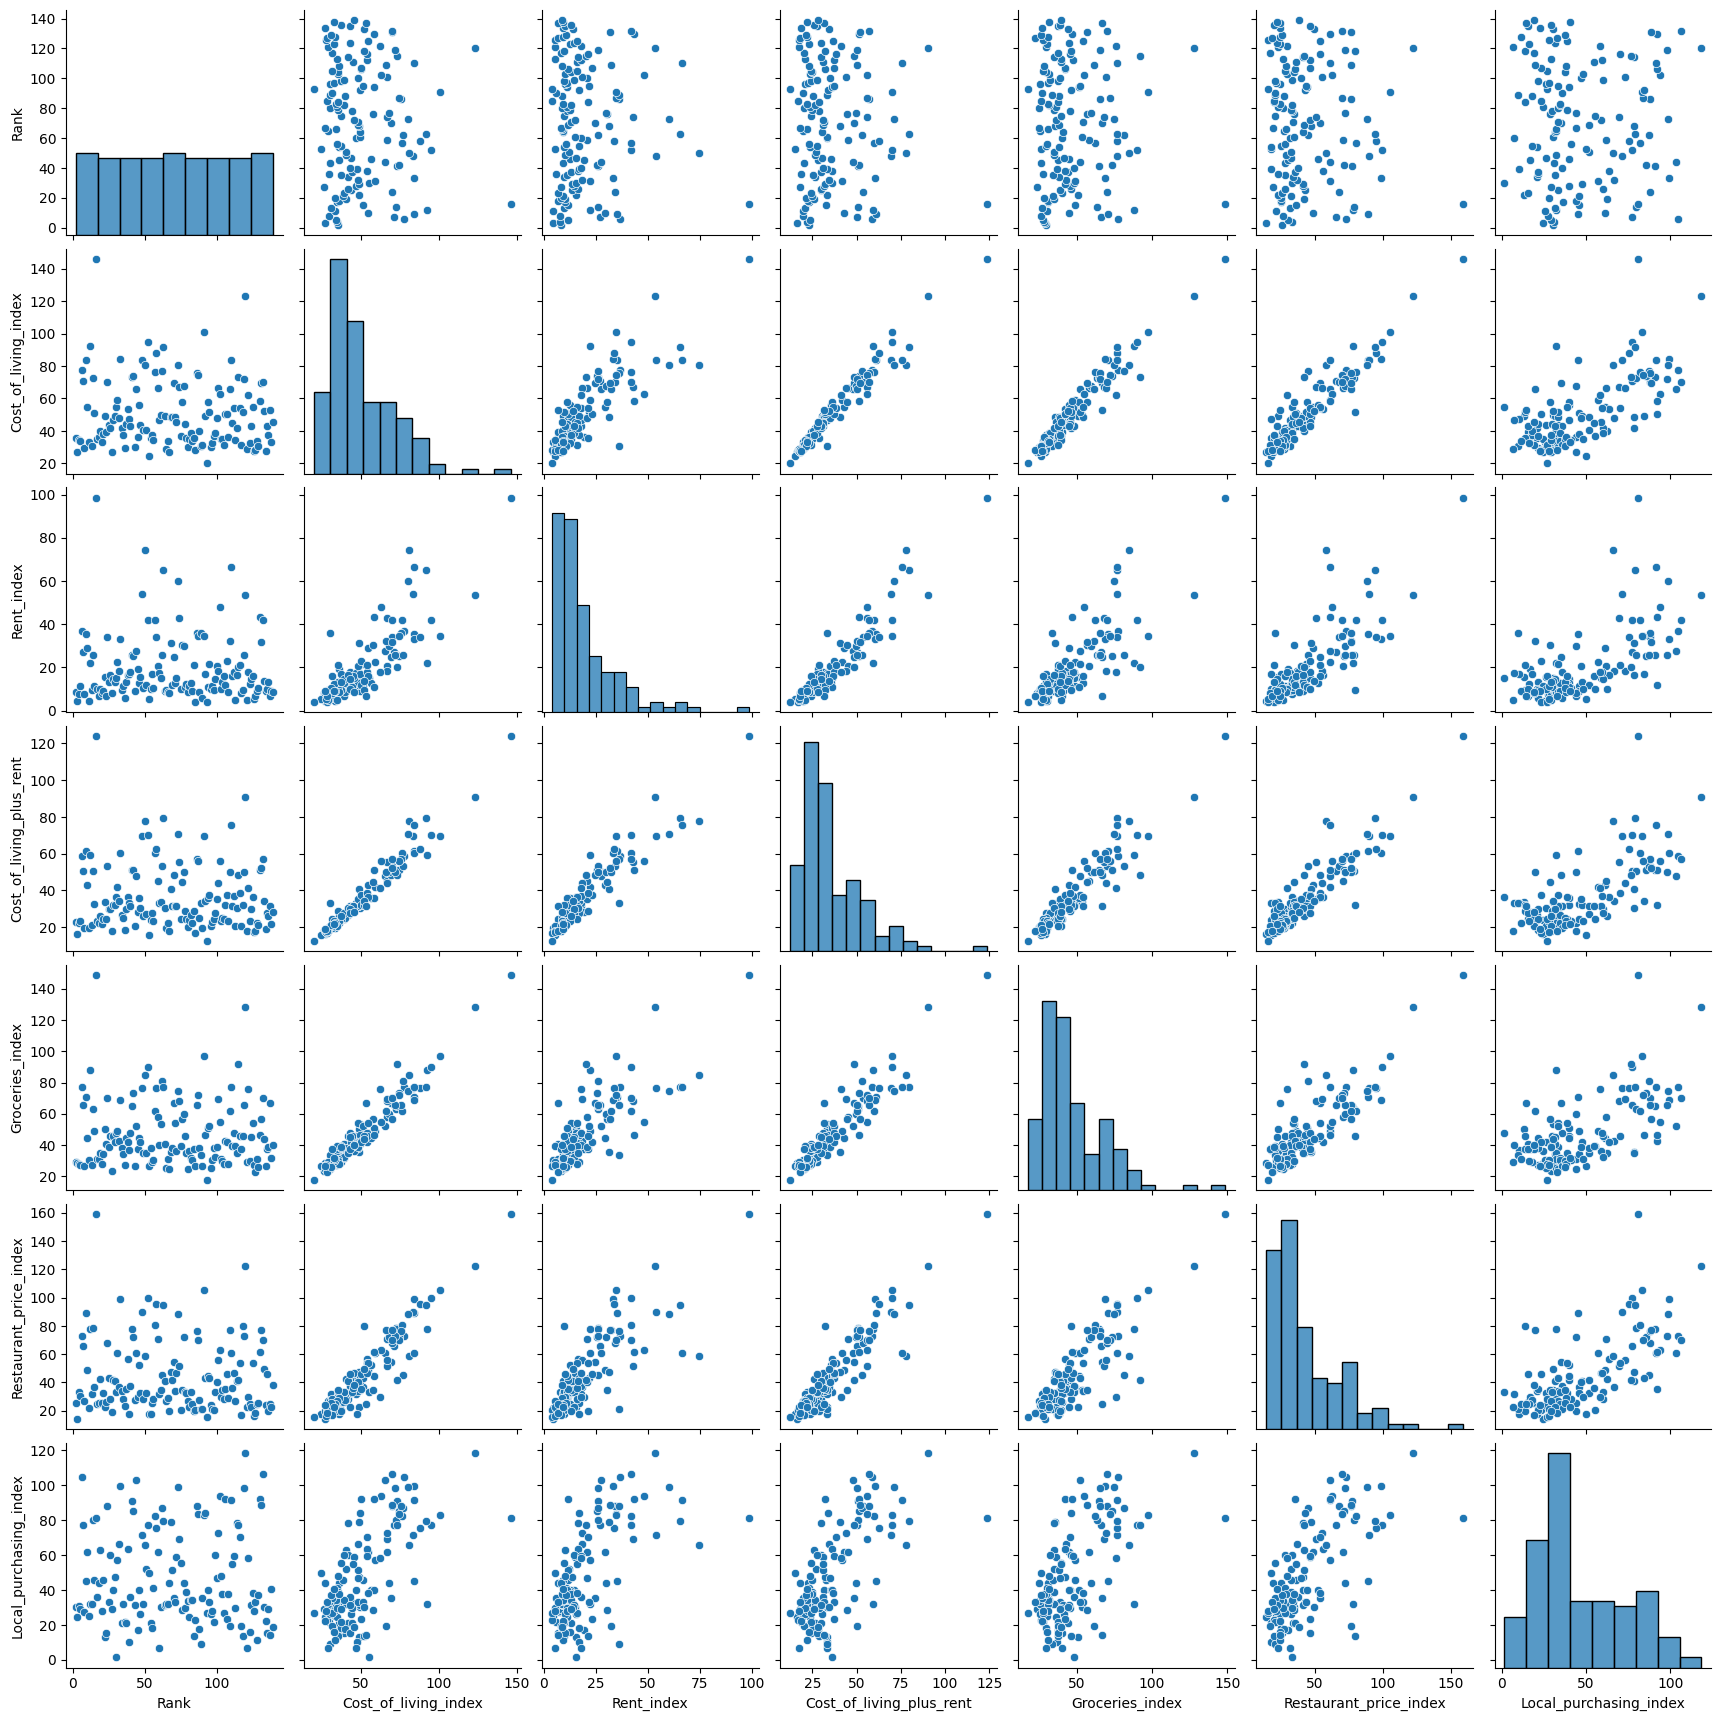

In [112]:
sns.pairplot(df)
plt.show()

In [113]:
df.head()

,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63


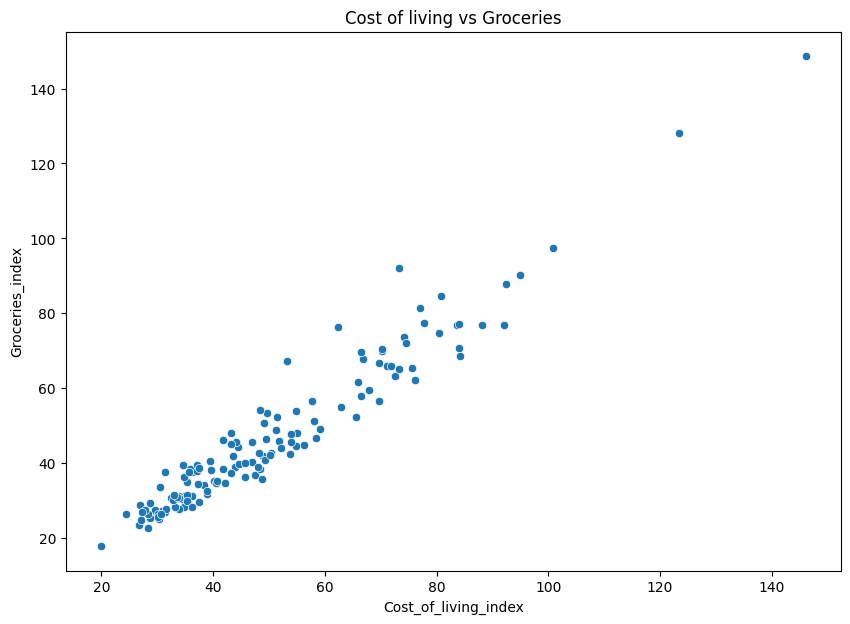

In [114]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Cost_of_living_index',y='Groceries_index', data=df)
plt.title('Cost of living vs Groceries')
plt.show()

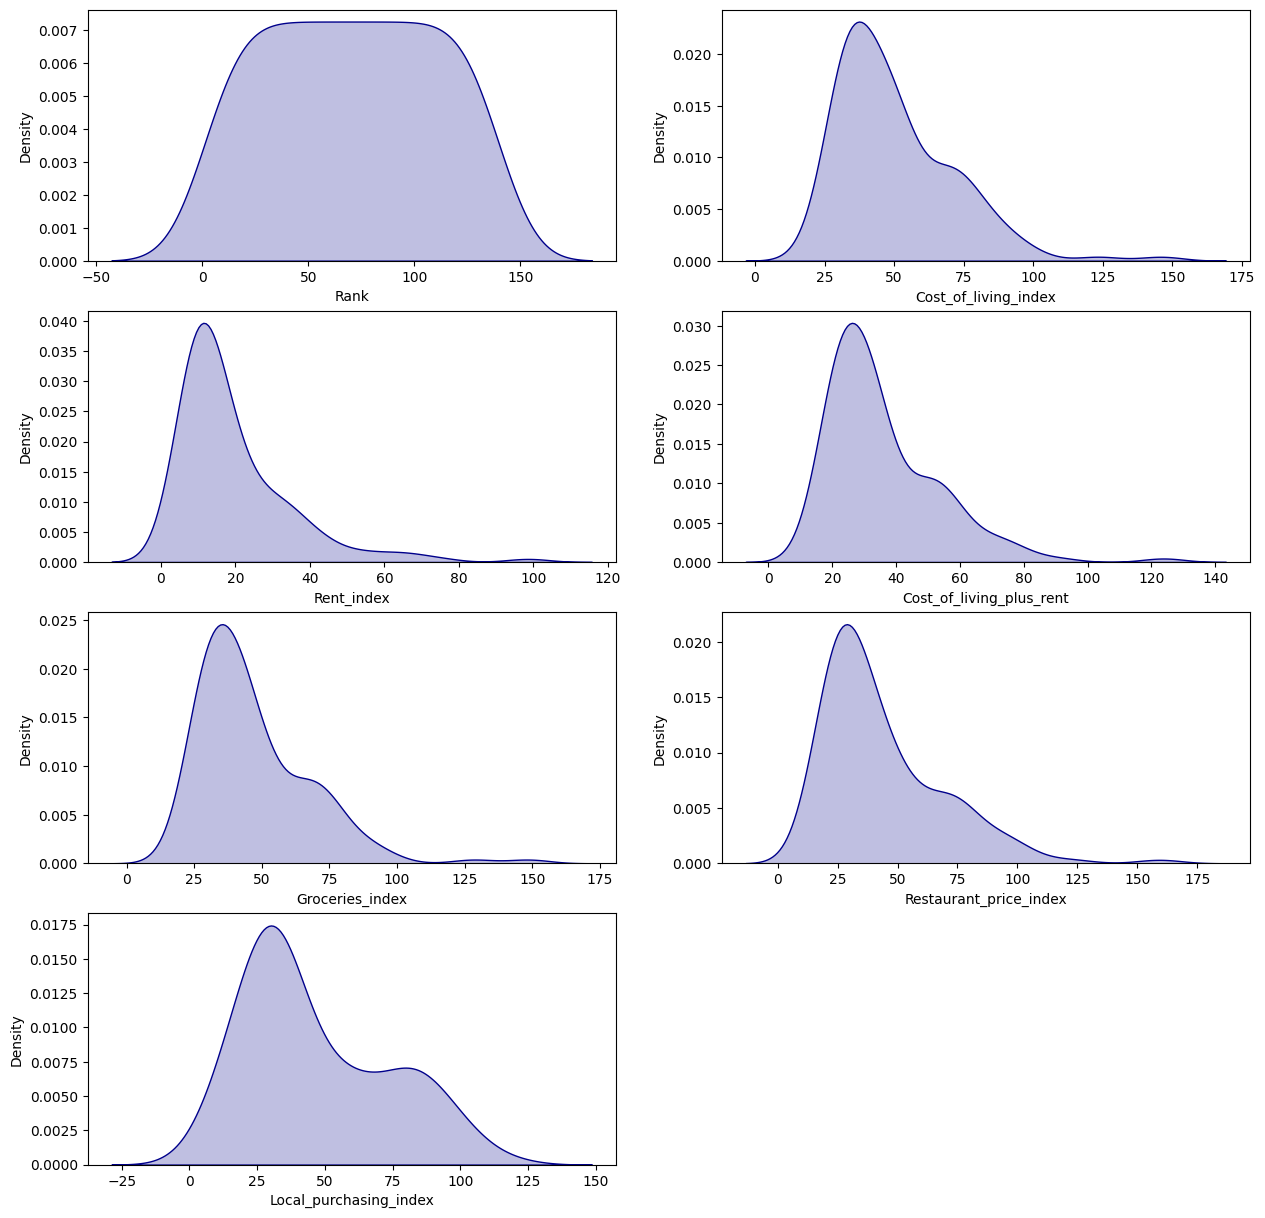

In [115]:
plt.figure(figsize=(15,15)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(4,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

# Outliers Treatment

In [116]:

numeric_df = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (only for numeric columns)
df_filtered = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
df_filtered.head()


,Rank,Country,Cost_of_living_index,Rent_index,Cost_of_living_plus_rent,Groceries_index,Restaurant_price_index,Local_purchasing_index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63


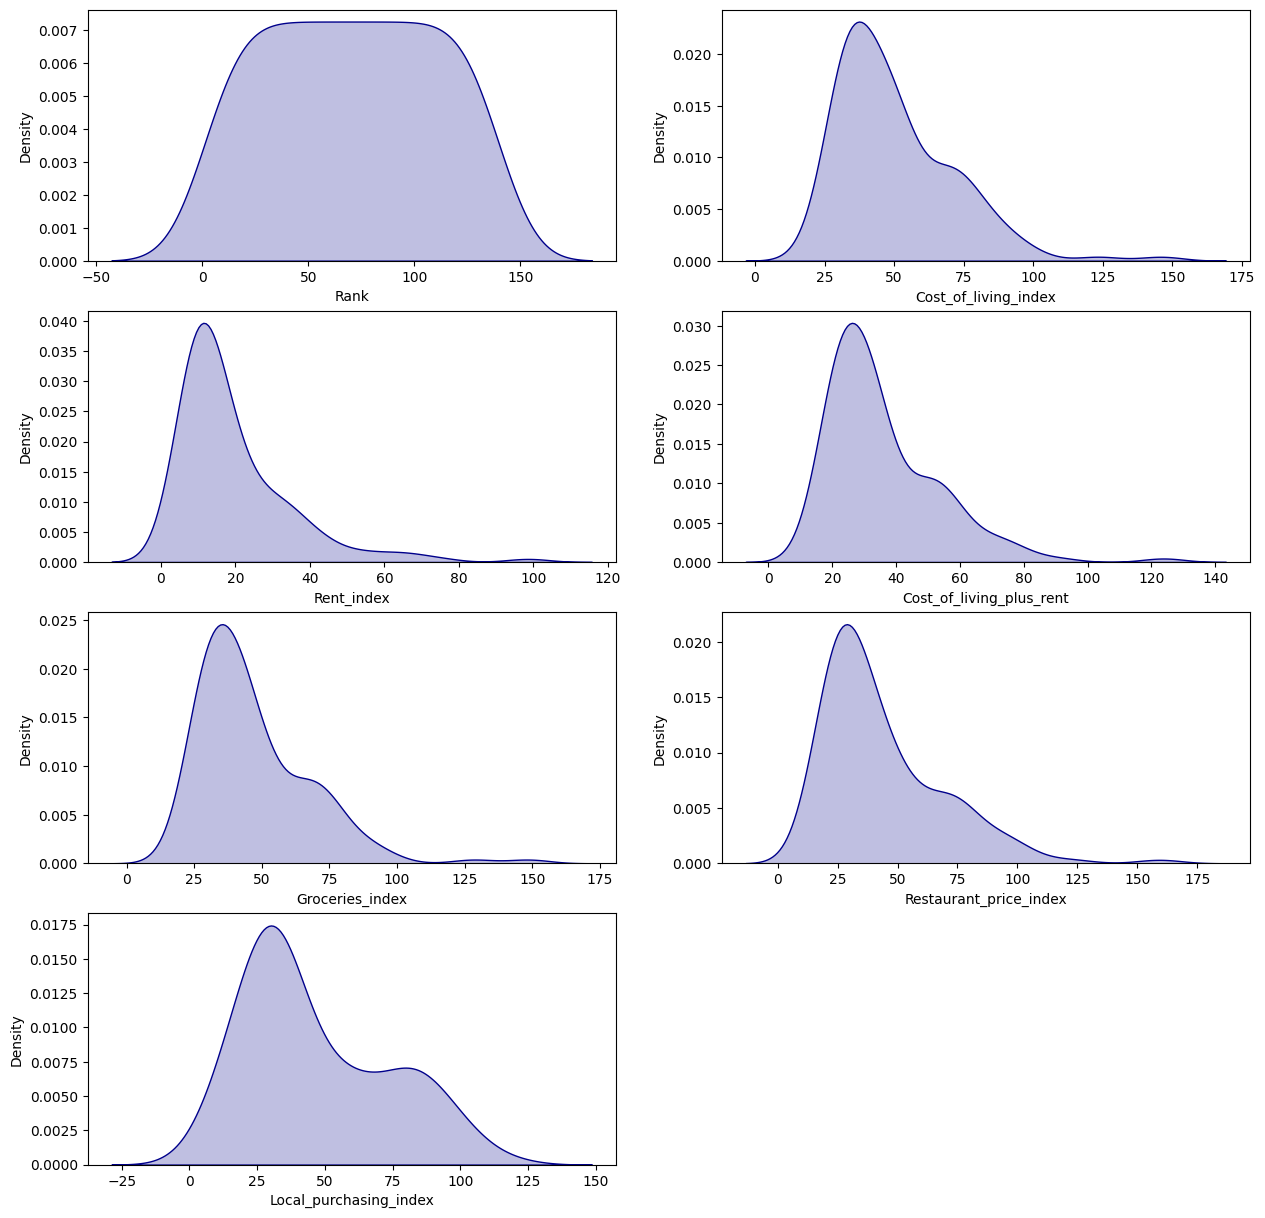

In [117]:
plt.figure(figsize=(15,15)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(4,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [118]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate skewness
skew_values = df_numeric.skew()

# Display skewness values
print(skew_values)

Rank                        0.000000
Cost_of_living_index        1.438359
Rent_index                  2.190939
Cost_of_living_plus_rent    1.698000
Groceries_index             1.707096
Restaurant_price_index      1.541727
Local_purchasing_index      0.658048
dtype: float64
